# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from functools import reduce

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [4]:
df = pd.read_csv('../../Datasets/NEWORDER.csv') #Dataset file
df.head()

,DATE,NEWORDER
0,1992-02-01,33857.0
1,1992-03-01,35258.0
2,1992-04-01,35992.0
3,1992-05-01,36811.0
4,1992-06-01,36666.0


In [5]:
recession = pd.read_csv('../../Datasets/Recession.csv')
recession.head()

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

#### Preparing data for jobless claim
- change to datetime object **['DATE']**
- create columns
  - moving average **['SMA50']**
  - percent change from previous point(week) **['PCT']**

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])
# using .rolling(window).mean() with window size = 50
df = df.set_index('DATE')
# removing all the NULL values using dropna() method
df.dropna(inplace=True)
df.head()

,NEWORDER
DATE,
1992-02-01,33857.0
1992-03-01,35258.0
1992-04-01,35992.0
1992-05-01,36811.0
1992-06-01,36666.0


#### Preparing data for recession periods
- change to datetime object **['DATE']**
- create lists
  - recession starting points 
  - recession ending points 

In [7]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)

[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


In [8]:
Reces = pd.DataFrame()
Reces['start'] = start
Reces['end'] = end
Reces

,start,end
0,1969-04-01,1970-10-01
1,1973-10-01,1975-01-01
2,1979-04-01,1980-04-01
3,1981-04-01,1982-04-01
4,1989-10-01,1991-01-01
5,2001-01-01,2001-07-01
6,2007-10-01,2009-04-01
7,2020-01-01,2020-04-01


<Axes: xlabel='DATE'>

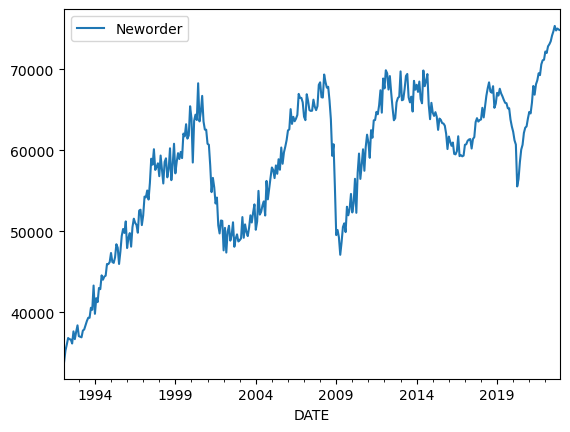

In [9]:
df.columns = ['Neworder']
df.plot()

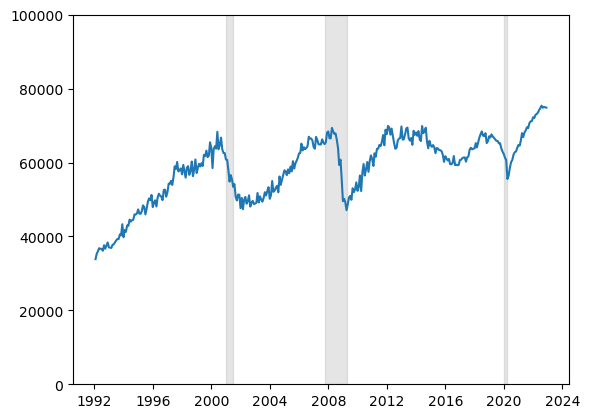

In [10]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Neworder'])
for i in range(len(start)):
  if i<5: continue
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.ylim(0,1e5)
plt.show()

In [11]:
df2 = df.copy()
df2.index = df2.index + dt.timedelta(days=1*30)

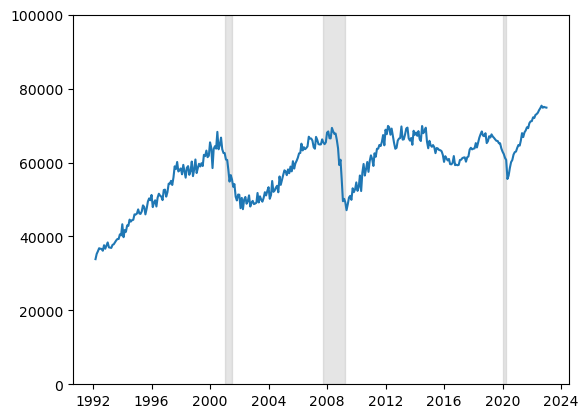

In [12]:
fig, ax = plt.subplots()
ax.plot(df2.index, df2['Neworder'])
for i in range(len(start)):
  if i<5: continue
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.ylim(0,1e5)
plt.show()

In [13]:
df2['MAX_1Y'] = np.nan
for i in range(len(df2)):
  if i >= 11:
    arr = np.array(df2['Neworder'])
    indices = [i-k for k in range(12)]
    take = np.take(arr, indices)
    df2['MAX_1Y'][i] = take.max()
  else:
    df2['MAX_1Y'][i] = np.nan

df2['CHG'] = (df2['Neworder'])/df2['MAX_1Y']

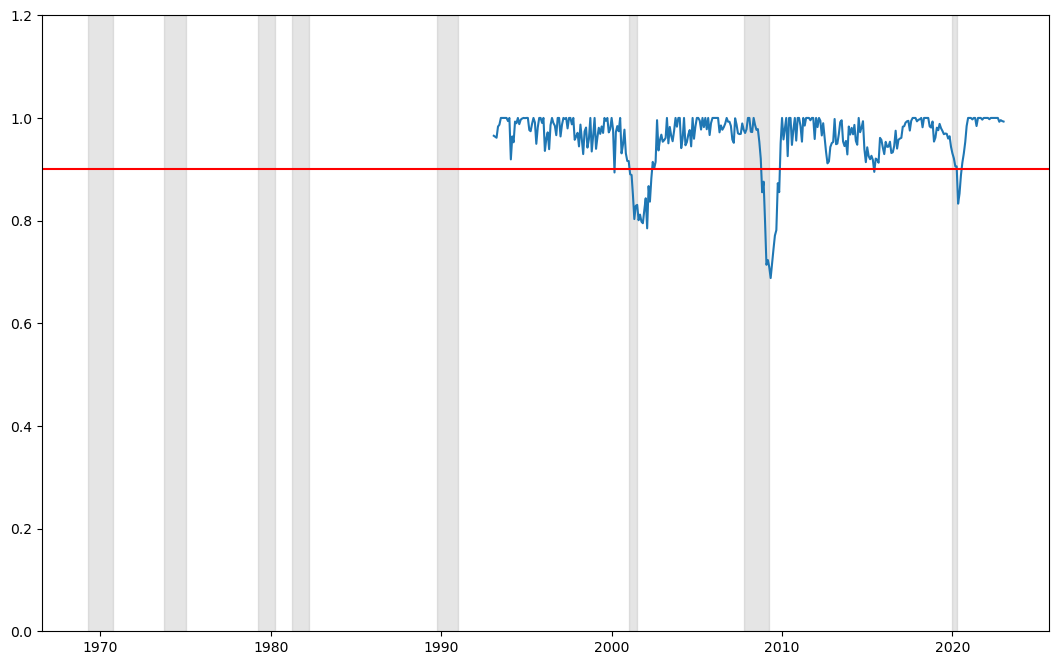

In [14]:
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(0.9, color='red')
plt.ylim(0,1.2)
plt.show()

In [15]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x<0.9))
df2

,Neworder,MAX_1Y,CHG,predict
DATE,,,,
1992-03-02,33857.0,NaN,NaN,0
1992-03-31,35258.0,NaN,NaN,0
1992-05-01,35992.0,NaN,NaN,0
1992-05-31,36811.0,NaN,NaN,0
1992-07-01,36666.0,NaN,NaN,0
...,...,...,...,...
2022-08-31,75379.0,75379.0,1.000000,0
2022-10-01,74819.0,75379.0,0.992571,0
2022-10-31,75055.0,75379.0,0.995702,0


In [16]:
li = []
for i in range(len(Reces)):
  li.append(df2.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
test = reduce(lambda x,y:x+y, li)
print(test.value_counts())
df2['recession'] = test.values.copy()

0    345
1     26
Name: DATE, dtype: int64


In [17]:
df2

,Neworder,MAX_1Y,CHG,predict,recession
DATE,,,,,
1992-03-02,33857.0,NaN,NaN,0,0
1992-03-31,35258.0,NaN,NaN,0,0
1992-05-01,35992.0,NaN,NaN,0,0
1992-05-31,36811.0,NaN,NaN,0,0
1992-07-01,36666.0,NaN,NaN,0,0
...,...,...,...,...,...
2022-08-31,75379.0,75379.0,1.000000,0,0
2022-10-01,74819.0,75379.0,0.992571,0,0
2022-10-31,75055.0,75379.0,0.995702,0,0


In [18]:
def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

# Test function

calc_TP_FP_rate(df2['recession'], df2['predict'])

(0.4230769230769231, 0.06666666666666667)

In [19]:
# Containers for true positive / false positive rates
tp_rates = []
fp_rates = []

threshold = np.linspace(0.5,1.5,num=50)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df2['predict'] = df2['CHG'].apply(lambda x: int(x<t))
    tp_rate, fp_rate = calc_TP_FP_rate(df2['recession'], df2['predict'])
        
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)

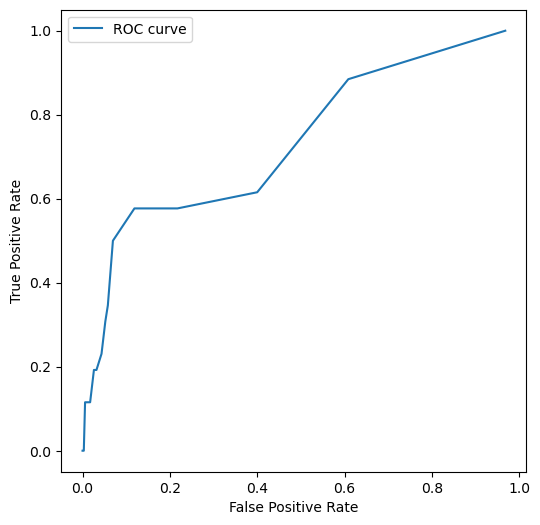

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates, tp_rates, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

In [21]:
tot = []

for i in range(0,13):
  dfi = df.copy()
  dfi.index = dfi.index + dt.timedelta(days=i*30)

  dfi['MAX_1Y'] = np.nan
  for i in range(len(dfi)):
    if i >= 5:
      arr = np.array(dfi['Neworder'])
      indices = [i-k for k in range(6)]
      take = np.take(arr, indices)
      dfi.iloc[i,1] = take.max()
    else:
      dfi.iloc[i,1] = np.nan

  dfi['CHG'] = (dfi['Neworder'])/dfi['MAX_1Y']
  li = []
  for i in range(len(Reces)):
    li.append(dfi.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
  test = reduce(lambda x,y:x+y, li)
  dfi['recession'] = test.values.copy()
  # Containers for true positive / false positive rates
  tp_rates = []
  fp_rates = []

  threshold = np.linspace(0.6,1.01,num=50)

  # Find true positive / false positive rate for each threshold
  for t in threshold:
      
      dfi['predict'] = dfi['CHG'].apply(lambda x: int(x<t))
      tp_rate, fp_rate = calc_TP_FP_rate(dfi['recession'], dfi['predict'])
          
      tp_rates.append(tp_rate)
      fp_rates.append(fp_rate)
  
  tot.append([fp_rates, tp_rates])

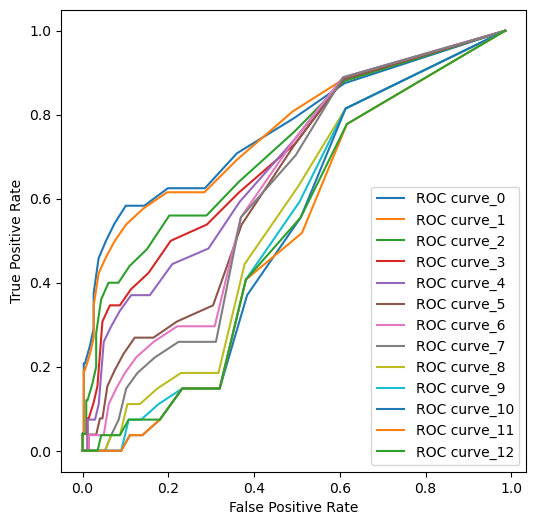

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(tot)):
  ax.plot(tot[i][0], tot[i][1], label=f'ROC curve_{i}')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

auc score for 0 month(s) prediction 0.7552833813640729
auc score for 1 month(s) prediction 0.7524526198439242
auc score for 2 month(s) prediction 0.7126589595375722
auc score for 3 month(s) prediction 0.6901895206243033
auc score for 4 month(s) prediction 0.6747954349698535
auc score for 5 month(s) prediction 0.6268115942028987
auc score for 6 month(s) prediction 0.6204242032730405
auc score for 7 month(s) prediction 0.6008290267011197
auc score for 8 month(s) prediction 0.5399440137812231
auc score for 9 month(s) prediction 0.5194336778639104
auc score for 10 month(s) prediction 0.506244616709733
auc score for 11 month(s) prediction 0.4959625322997416
auc score for 12 month(s) prediction 0.5054371231696813


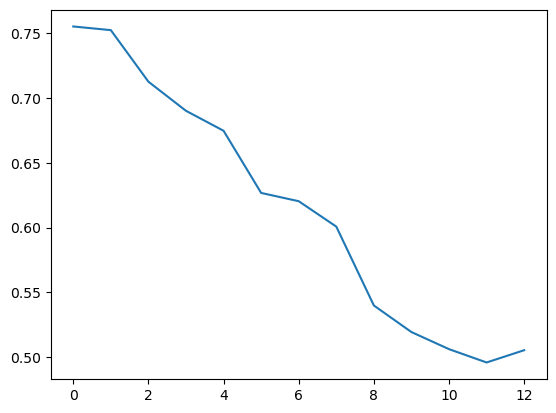

In [23]:
from sklearn.metrics import auc
auc_x = []
auc_y = []
for i in range(len(tot)):
  auc_x.append(i)
  auc_y.append(auc(tot[i][0], tot[i][1]))
  print(f'auc score for {i} month(s) prediction {auc_y[i]}')
plt.plot(auc_x, auc_y)

In [24]:
temp = pd.DataFrame()
temp['False positive'] = tot[1][0]
temp['True positive'] = tot[1][1]
temp

,False positive,True positive
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


In [25]:
# choose 0.197,0.615 find threshold
threshold = np.linspace(0.6,1.01,num=50)
final_thres = threshold[43]
print(final_thres)

0.959795918367347


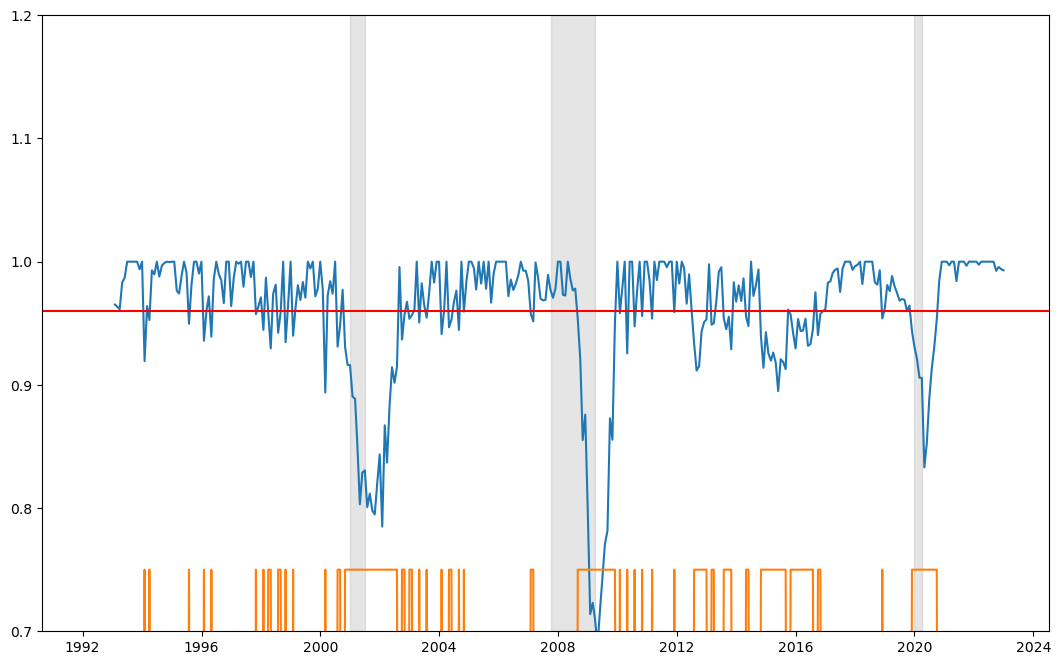

In [26]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x<final_thres))
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
ax.plot(df2.index, df2['predict']*0.75)
for i in range(len(start)):
  if i<5: continue
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres, color='red')
plt.ylim(0.7,1.2)
plt.show()

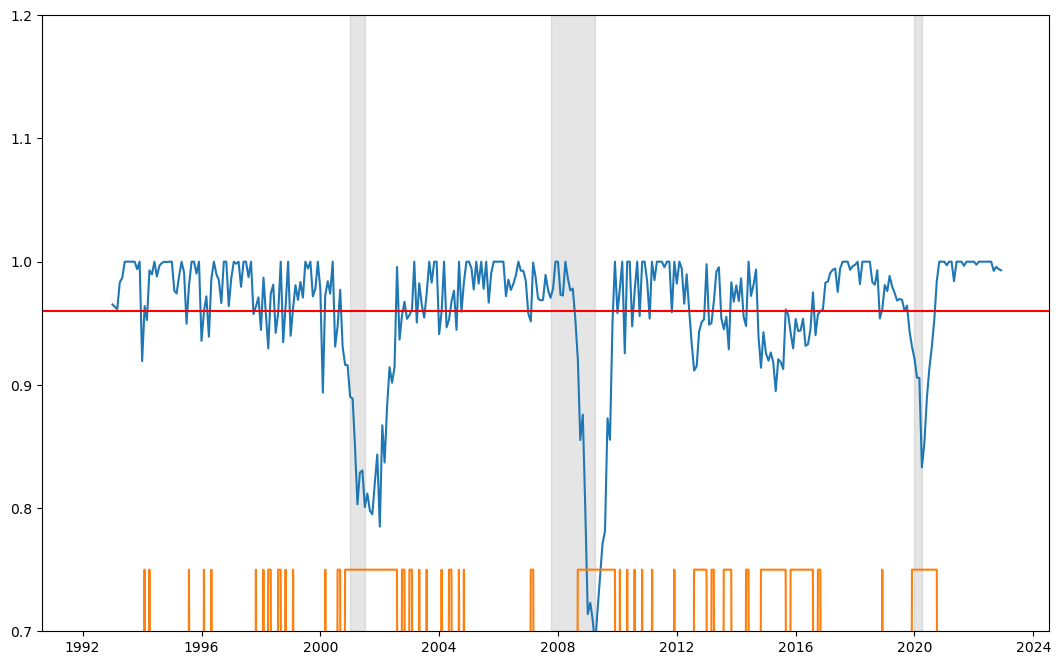

In [27]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x<final_thres))
df3 = df2.copy()
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df.index, df2['CHG'])
ax.plot(df2.index, df2['predict']*0.75)
for i in range(len(start)):
  if i<5: continue
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres, color='red')
plt.ylim(0.7,1.2)
plt.show()

In [28]:
df2['predict'].to_csv('Index2-prediction.csv')